In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import os
import pandas as pd

- Apartir de la recta $ y =3x +2 $ generar 15 puntos y asociar un error aleatorio de 0.2, graficar y guardar en un archivo

In [2]:
#Donde definimos
a=3
b=2
sigma=0.2

In [3]:
x_i=np.random.uniform(0,2, 15)

In [4]:
x_i

array([1.93905217, 1.09329248, 0.84684417, 1.73138936, 1.8219862 ,
       0.10294185, 1.85349555, 0.23220609, 0.92472211, 1.84948832,
       0.25837111, 1.67077511, 1.91144381, 0.02600868, 0.82537531])

In [5]:
y_i= 3*x_i +2

In [6]:
y_i

array([7.81715651, 5.27987744, 4.5405325 , 7.19416807, 7.4659586 ,
       2.30882555, 7.56048666, 2.69661826, 4.77416633, 7.54846496,
       2.77511334, 7.01232532, 7.73433143, 2.07802605, 4.47612594])

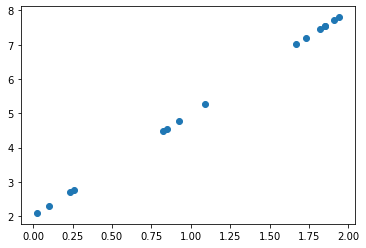

In [7]:
plt.scatter(x_i,y_i)

In [8]:
err=(sigma/2)*np.random.randn(15)

In [9]:
err

array([-0.23522748,  0.06429035, -0.03698448,  0.14823245,  0.18856609,
        0.04197808,  0.09128414, -0.12744048, -0.24379178, -0.06562769,
        0.05435783,  0.14211586,  0.01520299, -0.09824677, -0.06595325])

In [10]:
y_new= y_i+err

In [11]:
y_new

array([7.58192903, 5.34416778, 4.50354802, 7.34240052, 7.65452469,
       2.35080363, 7.6517708 , 2.56917778, 4.53037455, 7.48283727,
       2.82947118, 7.15444118, 7.74953442, 1.97977928, 4.41017269])

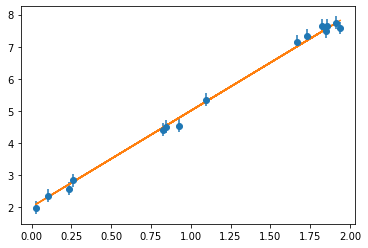

In [12]:
sigma=0.2
plt.errorbar(x_i, y_new, yerr=0.2,  xerr=None, fmt='o')
r = np.arange(10.)
plot(x_i,y_i,'-')

In [13]:
f=open('recta_error.txt', 'r')

In [14]:
n= np.array([x_i, y_new, err])

In [15]:
n=n.T

In [16]:
n

array([[ 1.93905217,  7.58192903, -0.23522748],
       [ 1.09329248,  5.34416778,  0.06429035],
       [ 0.84684417,  4.50354802, -0.03698448],
       [ 1.73138936,  7.34240052,  0.14823245],
       [ 1.8219862 ,  7.65452469,  0.18856609],
       [ 0.10294185,  2.35080363,  0.04197808],
       [ 1.85349555,  7.6517708 ,  0.09128414],
       [ 0.23220609,  2.56917778, -0.12744048],
       [ 0.92472211,  4.53037455, -0.24379178],
       [ 1.84948832,  7.48283727, -0.06562769],
       [ 0.25837111,  2.82947118,  0.05435783],
       [ 1.67077511,  7.15444118,  0.14211586],
       [ 1.91144381,  7.74953442,  0.01520299],
       [ 0.02600868,  1.97977928, -0.09824677],
       [ 0.82537531,  4.41017269, -0.06595325]])

In [17]:
np.savetxt('recta_error.txt', n, fmt="%f")

In [18]:
f=close()

- Leer puntos y barras de error desde un archivo 

In [19]:
f=open('recta_error.txt', 'r')

In [20]:
file=pd.read_csv('recta_error.txt',sep='\s+', header=None)

In [21]:
file

,0,1,2
0,1.939052,7.581929,-0.235227
1,1.093292,5.344168,0.064290
2,0.846844,4.503548,-0.036984
3,1.731389,7.342401,0.148232
4,1.821986,7.654525,0.188566
5,0.102942,2.350804,0.041978
6,1.853496,7.651771,0.091284
7,0.232206,2.569178,-0.127440
8,0.924722,4.530375,-0.243792
9,1.849488,7.482837,-0.065628


In [22]:
def line (x,m,b):
    return ((m*x)+b)

In [23]:
a_0, sigma_a0= 2.9, 0.1
b_0, sigma_b0=2.1, 0.1


In [24]:
a_sample=sigma_a0* np.random.randn(1000)+a_0

In [27]:
b_sample=sigma_b0* np.random.randn(1000)+b_0


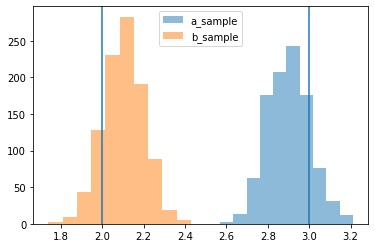

In [28]:
plt.hist(a_sample, alpha=0.5, label='a_sample')
plt.hist(b_sample, alpha=0.5, label='b_sample')
plt.axvline(a)
plt.axvline(b)
plt.legend()

In [29]:
#Para la clase, ya que no le estabamos dando un archivo inicial de entrada de los datos originales
#El chisq nos da el log del likelihood

def chisq(theta, data):
    x=x_i      #data[0]
    y=y_i       #data[1]
    yerr=sigma     #data[2]
    #lo siguiente depende del modelo 
    
    model= line(x, theta[0], theta[1])
    chisq= (y-model)**2 / yerr**2
    return chisq.sum()

In [30]:
chisq([2.1,3], [x_i, y_new, err])

151.9904063425986

In [31]:
chisq_=np.zeros_like(a_sample)
for i in range(len(a_sample)):
    chisq_[i]=chisq((a_sample[i], b_sample[i]), [y_i,x_i, 0.2])
    

In [32]:
min_chisq=np.min(chisq_)
a_best, b_best=a_sample[np.where(chisq_==min_chisq)], b_sample[np.where(chisq_==min_chisq)]

In [33]:
a_best

array([2.99922785])

In [34]:
b_best

array([1.99718471])

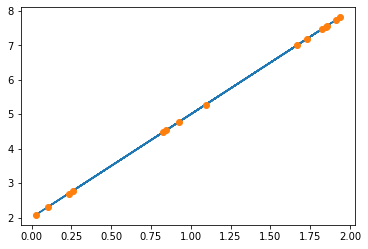

In [35]:
plot(x_i,y_i,'-')
plot(x_i, (a_best*x_i+b_best),'o' )